# Case 3. Medical text categorization
Thi, Le Thanh - 1504521 <br>
Cognitive Systems for Health Technology Applications <br>
Helsinki Metropolia University of Applied Sciences <br>

# Task
To use recurrent and convolutional neural networks to create a classifier for a collection of medical abstracts extracted from MEDLINE.

# Download and Preprocessing Data
http://disi.unitn.it/moschitti/corpora.htm. Download than pre-computed embedding from the link. Cardiovascular diseases abstracts, file name 'ohsumed-first-20000-docs.tar.gz'

In [1]:
from urllib.request import urlretrieve
url = r"http://disi.unitn.it/moschitti/corpora/ohsumed-first-20000-docs.tar.gz"
dst = 'ohsumed-first-20000-docs.tar.gz'
urlretrieve(url, dst)

('ohsumed-first-20000-docs.tar.gz', <http.client.HTTPMessage at 0x1400c45b550>)

In [2]:
# Extract the tarfile. Creates a folder: ohsu-trec
import tarfile
tar = tarfile.open("ohsumed-first-20000-docs.tar.gz")
tar.extractall()
tar.close()

# 
Collect the individual training review into a list of strings, on string per review and let's also collect the review labels into a lables list. So we have 23 Categories

In [3]:
import os

ohsumed_dir = r'C:\Users\Thi\Desktop\ohsumed-first-20000-docs'
train_dir = os.path.join(ohsumed_dir, 'training')

labels = []
texts = []

# Generate a list L = ['C01', 'C02, ..., 'C023']
L = ['C{:02}'.format(n) for n in range(1, 23 + 1)]
for label_type in L:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        f = open(os.path.join(dir_name, fname))
        texts.append(f.read())
        f.close()
        i = L.index(label_type)
        labels.append(i)

# Tokenize the text of the raw data
Vectorize the texts have been collected. We will review after 500 words and only consider the top 20,000 words in the dataset.

In [4]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 500        
max_words = 20000

tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens' % len(word_index))

Found 30857 unique tokens


In [5]:
#Shape the data and labels

from keras.utils.np_utils import to_categorical

data = pad_sequences(sequences, maxlen = maxlen)

labels = np.asarray(labels)
one_hot_labels = to_categorical(labels)


print('Shape of data tensor:', data.shape)
print('Shape of labels tensor:', one_hot_labels.shape)

Shape of data tensor: (10433, 500)
Shape of labels tensor: (10433, 23)


In [6]:
#Shuffle the data and labels

In [7]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
one_hot_labels = one_hot_labels[indices]

# Build the model
Make a simple network with random layer and number of neurals.

In [10]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(max_words, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(len(L), activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 8)            160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 4000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              4097024   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_3 (Dense)              (None, 23)                5911      
Total params: 4,525,335
Trainable params: 4,525,335
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Train the model

In [13]:
import time

t1 = time.time()
history = model.fit(data, one_hot_labels,
                   epochs = 10,
                   batch_size = 32,
                   validation_split = 0.2)
t2 = time.time()
print('Elapsed time: {:.2f} seconds'.format((t2-t1)))

Train on 8346 samples, validate on 2087 samples
Epoch 1/10
8346/8346 [==============================] - 58s 7ms/step - loss: 2.7404 - acc: 0.1973 - val_loss: 2.6500 - val_acc: 0.2329
Epoch 2/10
8346/8346 [==============================] - 56s 7ms/step - loss: 2.4171 - acc: 0.2816 - val_loss: 2.6038 - val_acc: 0.2544
Epoch 3/10
8346/8346 [==============================] - 56s 7ms/step - loss: 1.9807 - acc: 0.3699 - val_loss: 2.8503 - val_acc: 0.1787
Epoch 4/10
8346/8346 [==============================] - 55s 7ms/step - loss: 1.5952 - acc: 0.4752 - val_loss: 3.0187 - val_acc: 0.1485
Epoch 5/10
8346/8346 [==============================] - 55s 7ms/step - loss: 1.3420 - acc: 0.5087 - val_loss: 3.2955 - val_acc: 0.1346
Epoch 6/10
8346/8346 [==============================] - 54s 6ms/step - loss: 1.1688 - acc: 0.5270 - val_loss: 3.6446 - val_acc: 0.1332
Epoch 7/10
8346/8346 [==============================] - 52s 6ms/step - loss: 1.0450 - acc: 0.5369 - val_loss: 3.8777 - val_acc: 0.1375
Epoch 8

In [14]:
# Training results

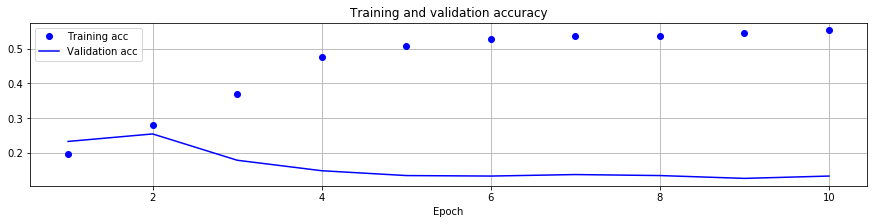

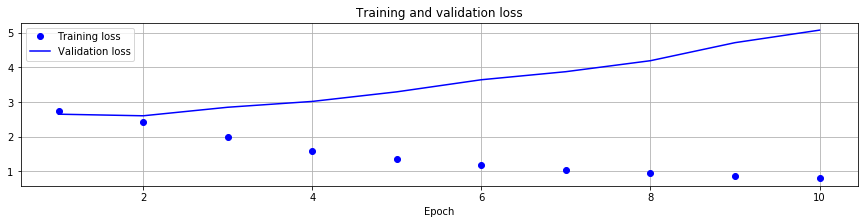

In [15]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(15, 3))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.grid()
plt.xlabel('Epoch')
plt.legend()


plt.figure(figsize=(15, 3))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.grid()
plt.xlabel('Epoch')
plt.legend()

plt.show()

# Metrics results

But looking the result above the highest accuracy we can get iss 25% at the second epoch. But to the classification, accuracy alone is a bad measure for the model.

In [17]:
# Calculate the predictions
predictions = model.predict(data)
y_pred = np.argmax(predictions, axis = 1)

In [15]:
# http://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, recall_score

In [20]:
# Confusion matrix
cm = confusion_matrix(labels, y_pred)
print(np.array2string(cm, max_line_width = 100))

[[241  10   1  13   7  15   4  18   2   3   8   4  13  15   1   5   8   0   0  16   9   2  28]
 [ 11  61   0  15   0   6   2   6   4   3   3   2   5   5   1   1   2   0   1  24   0   0   6]
 [  3   1  35   2   0   2   0   3   0   2   2   1   0   2   0   1   0   2   0   3   0   1   5]
 [ 10   4   1 886   8  15  20  41  17   7  11  23  14   6   3   5  12   2  21   7   3   0  47]
 [ 12   0   0  12 165   3   1   3   0   4   2   2   2   4   2   7   7   5   2   7  17   0  26]
 [ 26   5   3  77   4 286   0   9   0   3   1   7   6  26   2   4   8   8   8   6   6   7  86]
 [  2   1   0  10   3   1  72   1   2   0   0   1   0   2   0   0   1   2   0   0   0   0   2]
 [ 23   6   3  43   3   6   2 249  12   1   1   1   2  31   1   8   2   4   2  20  18   4  31]
 [  0   0   0  13   2   0   0   7  80   3   2   1   1   1   0   0   1   1   0   2   1   0  10]
 [ 11   3   2  45  24   7   4   4   2 239  16   4   8  51   0   7   6   6   8  13  32   4 125]
 [  1   1   2   7   4   1   1   0   0   0 108   2 

# Reading confusion matrix
We have 23 class, so our matrix 23x23. For example, in class/label 0, text belong to file C01, out of 498 prediction only 241 are correct. This ratio is precision, we can see it in below table. Another ratio is recall, 57% in class 0. It means in 423 text or data belong to class 0. The model only picks up 241. Combie both ratio we have f1-score to measure our model. The average score is 55%              

In [19]:
# Classification results per class
print(classification_report(labels, y_pred))

             precision    recall  f1-score   support

          0       0.48      0.57      0.52       423
          1       0.46      0.39      0.42       158
          2       0.59      0.54      0.56        65
          3       0.54      0.76      0.63      1163
          4       0.48      0.58      0.52       283
          5       0.57      0.49      0.53       588
          6       0.52      0.72      0.60       100
          7       0.51      0.53      0.52       473
          8       0.50      0.64      0.56       125
          9       0.73      0.38      0.50       621
         10       0.51      0.67      0.58       162
         11       0.60      0.46      0.52       491
         12       0.54      0.59      0.56       281
         13       0.61      0.76      0.68      1249
         14       0.67      0.30      0.41       215
         15       0.51      0.62      0.56       200
         16       0.53      0.55      0.54       295
         17       0.67      0.58      0.62   

# Try to improve performance
By add more tool, changing the capacity of network to get a better result

In [8]:
# Require Libraries
from keras.layers import LSTM,  Dropout, Conv1D, MaxPooling1D, GlobalMaxPooling1D, GRU

In [11]:
model = Sequential()
model.add(Embedding(max_words, 32, input_length=maxlen))
model.add(Conv1D(32, 9, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32, 9, activation='relu'))
model.add(GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(len(L), activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           640000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 492, 32)           9248      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 90, 32)            9248      
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              33792     
_________________________________________________________________
dense_5 (Dense)              (None, 23)                23575     
Total para

# 
I add a convnet layer after embedding word, increase dimension and use the rule of thumbs. The rule is if N is output. The number of neural in hidden layer will in ration of ...3xN 2xN 1.5xN N
GRU in place of Flatten, LSTM or GlobalMaxPooling.  <br>

The result: parameter is reduce from 4,5 million to around 7 hundred thousand. The validation accuracy is poorly


In [13]:
import time
t1 = time.time()
history = model.fit(data, one_hot_labels,
                   epochs = 12,
                   batch_size = 32,
                   validation_split = 0.2)
t2 = time.time()
print('Elapsed time: {:.2f} seconds'.format((t2-t1)))

Train on 8346 samples, validate on 2087 samples
Epoch 1/12
8346/8346 [==============================] - 62s 7ms/step - loss: 2.8802 - acc: 0.1517 - val_loss: 2.8993 - val_acc: 0.1260
Epoch 2/12
8346/8346 [==============================] - 61s 7ms/step - loss: 2.8328 - acc: 0.1511 - val_loss: 2.9058 - val_acc: 0.1188
Epoch 3/12
8346/8346 [==============================] - 66s 8ms/step - loss: 2.7751 - acc: 0.1745 - val_loss: 2.8755 - val_acc: 0.1893
Epoch 4/12
8346/8346 [==============================] - 62s 7ms/step - loss: 2.7961 - acc: 0.1742 - val_loss: 2.9464 - val_acc: 0.1514
Epoch 5/12
8346/8346 [==============================] - 60s 7ms/step - loss: 2.8355 - acc: 0.1842 - val_loss: 2.9466 - val_acc: 0.1998
Epoch 6/12
8346/8346 [==============================] - 64s 8ms/step - loss: 2.8873 - acc: 0.1964 - val_loss: 3.5905 - val_acc: 0.1893
Epoch 7/12
8346/8346 [==============================] - 62s 7ms/step - loss: 2.9915 - acc: 0.1825 - val_loss: 3.5039 - val_acc: 0.1030
Epoch 8

# 
Compare to the first model. It does better in the later epochs so I thought perhap if I introduce to resisting overfitting tools, it could do better.

In [77]:
from keras import regularizers

model = Sequential()
model.add(Embedding(max_words, 46, input_length=maxlen))
model.add(Flatten())
model.add(Dense(690,kernel_regularizer=regularizers.l2(0.009), activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(460,kernel_regularizer=regularizers.l2(0.009), activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(230,kernel_regularizer=regularizers.l2(0.009), activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(len(L), activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_31 (Embedding)     (None, 500, 46)           920000    
_________________________________________________________________
flatten_20 (Flatten)         (None, 23000)             0         
_________________________________________________________________
dense_97 (Dense)             (None, 690)               15870690  
_________________________________________________________________
dropout_65 (Dropout)         (None, 690)               0         
_________________________________________________________________
dense_98 (Dense)             (None, 460)               317860    
_________________________________________________________________
dropout_66 (Dropout)         (None, 460)               0         
_________________________________________________________________
dense_99 (Dense)             (None, 230)               106030    
__________

# 
The capacity of the model have been increase and also I add two way to reduce overfitting, droptou and regulazier. <br>

The result: The losses have been increase but the accuracies still nearly the same even after 30 epochs, but it does resist the overfitting.

In [78]:
t1 = time.time()
history = model.fit(data, one_hot_labels,
                   epochs = 30,
                   batch_size = 128,
                   validation_split = 0.2)
t2 = time.time()
print('Elapsed time: {:.2f} seconds'.format((t2-t1)))

Train on 8346 samples, validate on 2087 samples
Epoch 1/30
8346/8346 [==============================] - 66s 8ms/step - loss: 6.1785 - acc: 0.1540 - val_loss: 3.5134 - val_acc: 0.1730
Epoch 2/30
8346/8346 [==============================] - 62s 7ms/step - loss: 3.1463 - acc: 0.1619 - val_loss: 2.9485 - val_acc: 0.1730
Epoch 3/30
8346/8346 [==============================] - 61s 7ms/step - loss: 2.8716 - acc: 0.1783 - val_loss: 2.8595 - val_acc: 0.1969
Epoch 4/30
8346/8346 [==============================] - 61s 7ms/step - loss: 2.7765 - acc: 0.1945 - val_loss: 2.9264 - val_acc: 0.1931
Epoch 5/30
8346/8346 [==============================] - 61s 7ms/step - loss: 2.7253 - acc: 0.2006 - val_loss: 2.8743 - val_acc: 0.1854
Epoch 6/30
8346/8346 [==============================] - 60s 7ms/step - loss: 2.7001 - acc: 0.2160 - val_loss: 2.8572 - val_acc: 0.1869
Epoch 7/30
8346/8346 [==============================] - 61s 7ms/step - loss: 2.6663 - acc: 0.2171 - val_loss: 2.8434 - val_acc: 0.1907
Epoch 8

In [83]:
model = Sequential()
model.add(Embedding(max_words, 32, input_length=maxlen))
model.add(Conv1D(32, 9, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32, 9, activation='relu'))
model.add(GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(len(L), activation = 'softmax'))

model.compile(loss='binary_crossentropy', 
              optimizer='adamax', 
              metrics= ['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_34 (Embedding)     (None, 500, 32)           640000    
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 492, 32)           9248      
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 98, 32)            0         
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 90, 32)            9248      
_________________________________________________________________
gru_5 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_105 (Dense)            (None, 1024)              33792     
_________________________________________________________________
dense_106 (Dense)            (None, 23)                23575     
Total para

# 
The best performance in train and validate but this's just a nonsense model, created after many anttempt to improve the model

In [84]:
t1 = time.time()
history = model.fit(data, one_hot_labels,
                   epochs = 10,
                   batch_size = 128,
                   validation_split = 0.2)
t2 = time.time()
print('Elapsed time: {:.2f} seconds'.format((t2-t1)))

Train on 8346 samples, validate on 2087 samples
Epoch 1/10
8346/8346 [==============================] - 31s 4ms/step - loss: 0.1653 - acc: 0.9565 - val_loss: 0.1631 - val_acc: 0.9565
Epoch 2/10
8346/8346 [==============================] - 26s 3ms/step - loss: 0.1619 - acc: 0.9565 - val_loss: 0.1615 - val_acc: 0.9565
Epoch 3/10
8346/8346 [==============================] - 26s 3ms/step - loss: 0.1576 - acc: 0.9566 - val_loss: 0.1607 - val_acc: 0.9566
Epoch 4/10
8346/8346 [==============================] - 26s 3ms/step - loss: 0.1533 - acc: 0.9569 - val_loss: 0.1613 - val_acc: 0.9565
Epoch 5/10
8346/8346 [==============================] - 26s 3ms/step - loss: 0.1497 - acc: 0.9570 - val_loss: 0.1611 - val_acc: 0.9565
Epoch 6/10
8346/8346 [==============================] - 26s 3ms/step - loss: 0.1467 - acc: 0.9574 - val_loss: 0.1637 - val_acc: 0.9566
Epoch 7/10
8346/8346 [==============================] - 26s 3ms/step - loss: 0.1444 - acc: 0.9576 - val_loss: 0.1644 - val_acc: 0.9564
Epoch 8

In [86]:
from keras.metrics import categorical_accuracy

model = Sequential()
model.add(Embedding(max_words, 32, input_length=maxlen))
model.add(Conv1D(32, 9, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32, 9, activation='relu'))
model.add(GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(len(L), activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = [categorical_accuracy])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_36 (Embedding)     (None, 500, 32)           640000    
_________________________________________________________________
conv1d_32 (Conv1D)           (None, 492, 32)           9248      
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 98, 32)            0         
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 90, 32)            9248      
_________________________________________________________________
gru_7 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_109 (Dense)            (None, 1024)              33792     
_________________________________________________________________
dense_110 (Dense)            (None, 23)                23575     
Total para

# 
Last try and still fail

In [87]:
t1 = time.time()
history = model.fit(data, one_hot_labels,
                   epochs = 10,
                   batch_size = 128,
                   validation_split = 0.2)
t2 = time.time()
print('Elapsed time: {:.2f} seconds'.format((t2-t1)))

Train on 8346 samples, validate on 2087 samples
Epoch 1/10
8346/8346 [==============================] - 30s 4ms/step - loss: 2.8232 - categorical_accuracy: 0.1674 - val_loss: 2.7949 - val_categorical_accuracy: 0.1730
Epoch 2/10
8346/8346 [==============================] - 25s 3ms/step - loss: 2.7035 - categorical_accuracy: 0.1751 - val_loss: 2.6963 - val_categorical_accuracy: 0.2065
Epoch 3/10
8346/8346 [==============================] - 26s 3ms/step - loss: 2.5764 - categorical_accuracy: 0.2025 - val_loss: 2.8164 - val_categorical_accuracy: 0.2113
Epoch 4/10
8346/8346 [==============================] - 26s 3ms/step - loss: 2.5005 - categorical_accuracy: 0.2213 - val_loss: 2.7194 - val_categorical_accuracy: 0.2084
Epoch 5/10
8346/8346 [==============================] - 26s 3ms/step - loss: 2.4247 - categorical_accuracy: 0.2505 - val_loss: 2.7581 - val_categorical_accuracy: 0.2276
Epoch 6/10
8346/8346 [==============================] - 26s 3ms/step - loss: 2.3287 - categorical_accuracy:

# Conclusion
After the first model witout convet still give the best performance. Reading test is quite hard cause text is reading by human using natural language and so far right now. Human only can "communicate" with computer through programming language. I think the first step try to improve this task preprocessing, before tolkenize and embedding. A filter to clean the text before hand, drop out all the word with unnecessary or bring confusion to the machine.
